# Assignment Questions 5 

 **Question 1**

Convert 1D Array Into 2D Array

You are given a **0-indexed** 1-dimensional (1D) integer array original, and two integers, m and n. You are tasked with creating a 
2-dimensional (2D) array with  m rows and n columns using **all** the elements from original.

The elements from indices 0 to n - 1 (**inclusive**) of original should form the first row of the constructed 2D array, the elements 
from indices n to 2 * n - 1 (**inclusive**) should form the second row of the constructed 2D array, and so on.

Return *an* m x n *2D array constructed according to the above procedure, or an empty 2D array if it is impossible*.

**Example 1:**



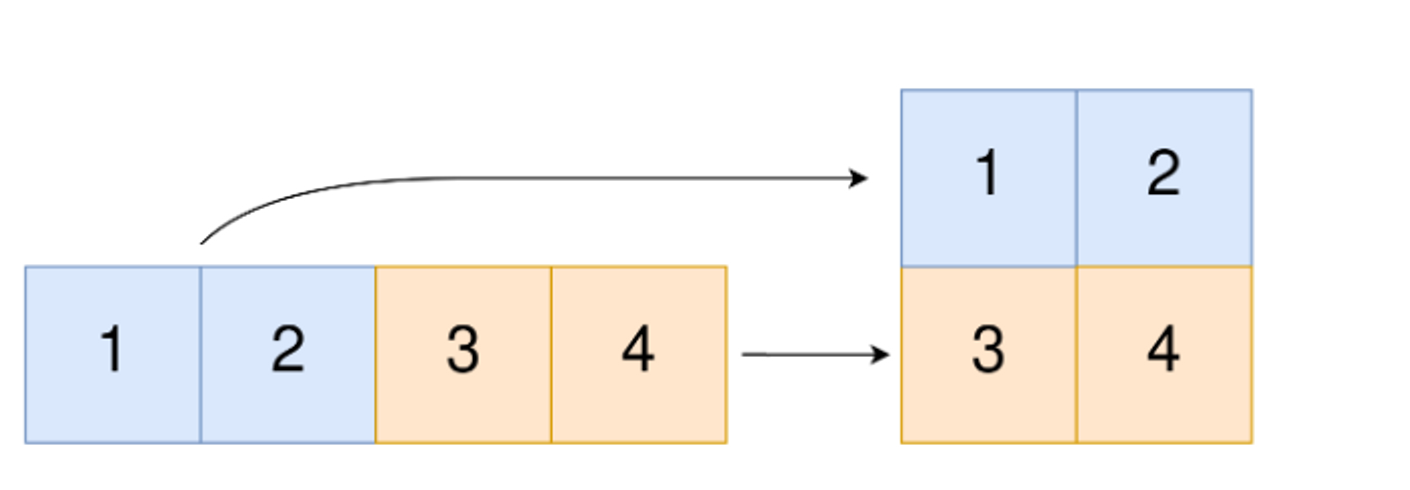

**Input:** original = [1,2,3,4], m = 2, n = 2

**Output:** [[1,2],[3,4]]

**Explanation:** The constructed 2D array should contain 2 rows and 2 columns.

The first group of n=2 elements in original, [1,2], becomes the first row in the constructed 2D array.

The second group of n=2 elements in original, [3,4], becomes the second row in the constructed 2D array.

In [24]:
original = [1,2,3,4]
m = 2
n = 2
def construct2DArray(original: list[int], m: int, n: int) -> list[list[int]]:
    """Takes a 1D array and constructs a 2D array

    Args:
        original (list[int]): 1D array of integers
        m (int): number of rows in the 2D array
        n (int): number of columns in the 2D array

    Returns:
        list[list[int]]: 2D array of integers
    """
    if len(original) != m*n:
        return []
    else:
        result = []
        for i in range(0,len(original),n):
            result.append(original[i:i+n])
        return result
construct2DArray(original,m,n)

[[1, 2], [3, 4]]

Question 2. You have n coins and you want to build a staircase with these coins. The staircase consists of k rows where the ith row
has exactly i coins. The last row of the staircase **may be** incomplete.

Given the integer n, return *the number of **complete rows** of the staircase you will build*.

**Example 1:**

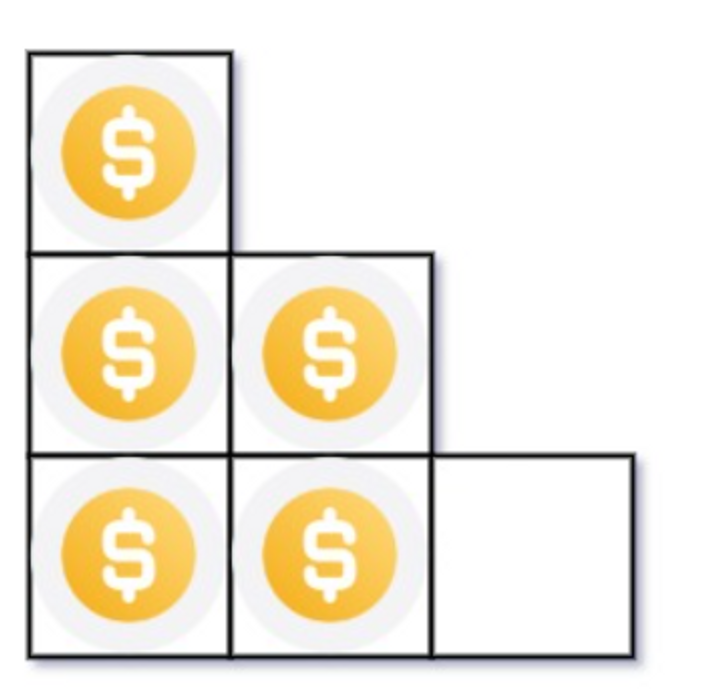

**Input:** n = 5

**Output:** 2

**Explanation:** Because the 3rd row is incomplete, we return 2.

In [26]:
def row_count(n:int,count=0)->int:
    left = 0 
    right  = n
    while left <= right:
        k = (left + right) //2
        curr = k * (k+1) //2 ## sum of 1+2+3+4+5....k =  k(k+1)//2
        if curr == n:
            return k
        elif n < curr:
            right = k - 1 
        else:
            left = k + 1

    return right
row_count(5)

2

**Question 3**

Given an integer array nums sorted in **non-decreasing** order, return *an array of **the squares of each number** sorted in
non-decreasing order*.

**Example 1:**

**Input:** nums = [-4,-1,0,3,10]

**Output:** [0,1,9,16,100]

**Explanation:** After squaring, the array becomes [16,1,0,9,100].

After sorting, it becomes [0,1,9,16,100].



In [27]:
nums = [-4,-1,0,3,10]
def sorted_square(nums:list[int])->list:
    """takes a list of numbers
    squares them and returns a sorted list

    Args:
        nums (list[int]): list of numbers

    Returns:
        list: sorted list of numbers squared
    """
    
    return sorted([x**2 for x in nums])

sorted_square(nums)

[0, 1, 9, 16, 100]

**Question 4**

Given two **0-indexed** integer arrays nums1 and nums2, return *a list* answer *of size* 2 *where:*

- answer[0] *is a list of all **distinct** integers in* nums1 *which are **not** present in* nums2*.*
- answer[1] *is a list of all **distinct** integers in* nums2 *which are **not** present in* nums1.

**Note** that the integers in the lists may be returned in **any** order.

**Example 1:**

**Input:** nums1 = [1,2,3], nums2 = [2,4,6]

**Output:** [[1,3],[4,6]]

**Explanation:**

For nums1, nums1[1] = 2 is present at index 0 of nums2, whereas nums1[0] = 1 and nums1[2] = 3 are not present in nums2. Therefore, 
answer[0] = [1,3].

For nums2, nums2[0] = 2 is present at index 1 of nums1, whereas nums2[1] = 4 and nums2[2] = 6 are not present in nums2. Therefore, 
answer[1] = [4,6].



In [28]:
nums1 = [1,2,3]
nums2 = [2,4,6]
def findDifference(nums1: list[int], nums2: list[int]) -> list[list[int]]:
    """Takes 2 arrays of numbers and returns 
    a list of differences between each array with the other array

    Args:
        nums1 (list[int]): array of numbers
        nums2 (list[int]): array of numbers

    Returns:
        list[list[int]]: list[array1 - array2 , array2 - array1]
    """
    return [list(set(nums1).difference(nums2)), list(set(nums2).difference(nums1))]
findDifference(nums1, nums2)

[[1, 3], [4, 6]]

**Question 5**

Given two integer arrays arr1 and arr2, and the integer d, *return the distance value between the two arrays*.

The distance value is defined as the number of elements arr1[i] such that there is not any element arr2[j] where |arr1[i]-arr2[j]| <= d.

**Example 1:**

**Input:** arr1 = [4,5,8], arr2 = [10,9,1,8], d = 2

**Output:** 2

**Explanation:**

For arr1[0]=4 we have:

|4-10|=6 > d=2

|4-9|=5 > d=2

|4-1|=3 > d=2

|4-8|=4 > d=2

For arr1[1]=5 we have:

|5-10|=5 > d=2

|5-9|=4 > d=2

|5-1|=4 > d=2

|5-8|=3 > d=2

For arr1[2]=8 we have:

**|8-10|=2 <= d=2**

**|8-9|=1 <= d=2**

|8-1|=7 > d=2

**|8-8|=0 <= d=2**

</aside>

In [29]:
arr1 = [4,5,8]
arr2 = [10,9,1,8]
d = 2
def findTheDistanceValue(arr1: list[int], arr2: list[int], d: int) -> int:
        res, buckets = 0, dict() # (minVa, maxVal)
        
        def getKey(val):
            return val // d
        
        def addVal(val):
            key = getKey(val)
            #save only min and max value in bucket, others values not
            if key in buckets:
                if buckets[key][0] > val: buckets[key][0] = val
                elif buckets[key][1] < val: buckets[key][1] = val
            else:
                buckets[key] = [val, val]
        
        #initialize buckets     
        for val in arr2: addVal(val)

        for val in arr1:
            key = getKey(val)
            if key in buckets: continue #in one bucket all values x < d
            #check sibling buckets
            if key - 1 in buckets and val - buckets[key-1][1] <= d: continue #maxVal from the left side is nearest
            if key + 1 in buckets and buckets[key+1][0] - val <= d: continue #minVal from the right side is nearest
            res += 1

        return res

findTheDistanceValue(arr1 , arr2 ,d)

2

**Question 6**

Given an integer array nums of length n where all the integers of nums are in the range [1, n] and each integer appears 
**once** or **twice**, return *an array of all the integers that appears **twice***.

You must write an algorithm that runs in O(n) time and uses only constant extra space.

**Example 1:**

**Input:** nums = [4,3,2,7,8,2,3,1]

**Output:**

[2,3]

</aside>


In [30]:
nums = [4,3,2,7,8,2,3,1]
def findDuplicates(nums: list[int]) -> list[int]:
    d = {}
    for i in nums:
        d[i] = d.get(i,0) + 1
    result = [key for key,value in d.items() if value==2]
    return(result)
findDuplicates(nums)

[3, 2]

**Question 7**

Suppose an array of length n sorted in ascending order is **rotated** between 1 and n times. For example, the array 
nums = [0,1,2,4,5,6,7] might become:

- [4,5,6,7,0,1,2] if it was rotated 4 times.
- [0,1,2,4,5,6,7] if it was rotated 7 times.

Notice that **rotating** an array [a[0], a[1], a[2], ..., a[n-1]] 1 time results in the array [a[n-1], a[0], a[1], a[2], ..., a[n-2]].

Given the sorted rotated array nums of **unique** elements, return *the minimum element of this array*.

You must write an algorithm that runs in O(log n) time.

**Example 1:**

**Input:** nums = [3,4,5,1,2]

**Output:** 1

**Explanation:**

The original array was [1,2,3,4,5] rotated 3 times.



In [31]:
nums = [3,4,5,1,2]
r = 3
def rotateArray(nums:list[int])->int:
    """Takes an array of numbers sorted in ascending order
    which has been rotated and returns its minimum value

    Args:
        nums (list[int]): array of numbers
        
    Returns:
        int: minimum value
    """
    
    return min(nums)
rotateArray(nums)

1

**Question 8**

An integer array original is transformed into a **doubled** array changed by appending **twice the value** of every element in original,
and then randomly **shuffling** the resulting array.

Given an array changed, return original *if* changed *is a **doubled** array. If* changed *is not a **doubled** array, return an empty 
array. The elements in* original *may be returned in **any** order*.

**Example 1:**

**Input:** changed = [1,3,4,2,6,8]

**Output:** [1,3,4]

**Explanation:** One possible original array could be [1,3,4]:

- Twice the value of 1 is 1 * 2 = 2.
- Twice the value of 3 is 3 * 2 = 6.
- Twice the value of 4 is 4 * 2 = 8.

Other original arrays could be [4,3,1] or [3,1,4].


In [32]:
changed = [1,3,4,2,6,8]
def findOriginalArray(changed: list[int]) -> list[int]:
    """checks if an array is doubled and returns the original
    array or empty list

    Args:
        changed (list[int]): doubled array

    Returns:
        list[int]: original array
    """
    from collections import Counter
    if len(changed)%2!=0:return []
    changed.sort()
    c=Counter(changed)
    ans=[]
    if c[0]%2==0:
        ans+=[0]*(c[0]//2)
        
    for i in c:
        if i==0 or c[i]==0:
            continue
        elif (i*2 not in c) or c[i]>c[i*2]:
            return []
        c[i*2]-=c[i]
        ans+=[i]*c[i]
            
    return ans
findOriginalArray(changed)

[1, 3, 4]